In [ ]:
## Compare utilazation between neighbrs and find any relations

In [7]:
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt, linspace, random
# from lmfit import Model
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
from datetime import datetime
from scipy.optimize import curve_fit
import scipy.stats as stats
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data_dir = 'D:/Thesis/dataset/'
file_path = data_dir + 'Volume Ground Truth/VolumeGroundTruth.xlsx'
ground_truth_data = pd.read_excel(file_path)
ground_truth_data.head()

,record id,date,time,road name,direction,road id,volume,level,lane,speed,volume/min/lane
0,1,41526,10:00:00,善缘街,西,14540,20,2,2,0.0,2.0
1,2,41526,11:55:00,善缘街,西,14540,2,2,2,0.0,0.2
2,3,41526,17:30:00,善缘街,西,14540,10,2,2,0.0,1.0
3,4,41527,09:40:00,海淀南路,西,17058,68,2,2,0.0,6.8
4,5,41527,12:40:00,海淀南路,西,17058,61,2,2,0.0,6.1


In [4]:
ground_truth_data_sel = ground_truth_data.loc[:, ['road id','level', 'lane', 'speed', 'volume/min/lane']]

In [5]:
ground_truth_level1 = ground_truth_data_sel[ground_truth_data_sel['level']<=1]
ground_truth_level2 = ground_truth_data_sel[ground_truth_data_sel['level']==2]
ground_truth_level3 = ground_truth_data_sel[ground_truth_data_sel['level']>=3]

In [8]:
ground_truth_level1['volume/min/lane'].head()

5     30.200000
9     32.450000
17    15.700000
21    12.666667
25    32.100000
Name: volume/min/lane, dtype: float64

In [11]:
def fit_normal_and_calculate_errors(data):
    """
    Fits a normal distribution to the given data and calculates R-squared and RMSE.

    Args:
        data (np.ndarray): A 1D numpy array of traffic volume data.

    Returns:
        tuple: A tuple containing:
               - params (tuple): The estimated parameters of the normal distribution (mean, standard deviation).
               - r_squared (float): The R-squared value of the fit.
               - rmse (float): The Root Mean Squared Error of the fit.
    """
    if len(data) < 2:
        raise ValueError("Input data must have at least two data points for fitting.")

    # 1. Estimate the parameters of the normal distribution
    mu, std = norm.fit(data)
    params = (mu, std)

    # 2. Generate predicted values using the fitted normal distribution
    # We'll use the sorted unique values from the data as the x-axis for prediction
    # to create a smooth curve. For error calculation, we need predictions
    # corresponding to the original data points.

    # To get predictions at the original data points, we need to think about
    # how the normal curve relates to the traffic volume. A direct prediction
    # isn't straightforward as the normal distribution is a probability density function.

    # A common approach when fitting a distribution to data and wanting to evaluate
    # the fit in terms of the original data values is to consider the CDF (Cumulative
    # Distribution Function) or to compare the histogram of the data to the PDF.

    # However, if you've *already* performed a curve fitting in a way that gives you
    # predicted traffic volume values corresponding to your original data points
    # (e.g., by fitting a normal curve to some transformed version of your data
    # or by using the PDF in a specific way to generate expected frequencies),
    # you should use those predicted values here.

    # Assuming for this example that you have a way to get predicted traffic volumes
    # 'y_predicted' that correspond to your original 'data'.
    # This might involve evaluating the PDF at certain points and scaling it,
    # or some other method you used for the fitting.

    # For demonstration, let's create a hypothetical 'y_predicted' based on
    # the fitted normal distribution. This is a simplification and might not
    # directly reflect your fitting process.

    sorted_data = np.sort(data)
    y_predicted_density = norm.pdf(sorted_data, mu, std)

    # Scaling the density to have a similar scale as the original data (this is a simplification)
    scale_factor = (
        np.max(data) / np.max(y_predicted_density)
        if np.max(y_predicted_density) > 0
        else 1
    )
    y_predicted = y_predicted_density * scale_factor

    # To calculate errors correctly, we need a one-to-one mapping between
    # the original data and the predicted values. If your fitting process
    # generated predictions in a different way, adjust this part accordingly.

    # A more direct way to evaluate the fit might be to compare the empirical
    # distribution of your data to the fitted normal distribution. However,
    # for R-squared and RMSE, we need paired predicted values.

    # Let's assume you have a method to get 'y_predicted' that aligns with 'data'.
    # If your method involved binning the data and fitting the normal curve to the
    # bin frequencies, then 'y_predicted' would correspond to those frequencies.

    # For this general code, we'll proceed assuming we have 'y_predicted'
    # with the same length as 'data'.

    if len(data) != len(y_predicted):
        raise ValueError(
            "The length of the original data and predicted data must be the same."
        )

    # 3. Calculate R-squared
    r_squared = r2_score(data, y_predicted)

    # 4. Calculate RMSE
    rmse = np.sqrt(mean_squared_error(data, y_predicted))

    return params, r_squared, rmse


# Example usage:
if __name__ == "__main__":
    # Generate some sample traffic volume data (replace with your actual data)
    # np.random.seed(42)
    # traffic_volume = np.random.normal(loc=100, scale=20, size=100)
    traffic_volume = ground_truth_level3['volume/min/lane']

    try:
        params, r_squared, rmse = fit_normal_and_calculate_errors(traffic_volume)
        mean, std_dev = params
        print(f"Fitted Normal Distribution Parameters:")
        print(f"  Mean (mu): {mean:.2f}")
        print(f"  Standard Deviation (sigma): {std_dev:.2f}")
        print(f"\nGoodness-of-Fit Metrics:")
        print(f"  R-squared (R²): {r_squared:.4f}")
        print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    except ValueError as e:
        print(f"Error: {e}")

Fitted Normal Distribution Parameters:
  Mean (mu): 3.18
  Standard Deviation (sigma): 2.61

Goodness-of-Fit Metrics:
  R-squared (R²): -1.4527
  Root Mean Squared Error (RMSE): 4.0920


#level-1
Fitted Normal Distribution Parameters:
  Mean (mu): 23.89
  Standard Deviation (sigma): 6.92

Goodness-of-Fit Metrics:
  R-squared (R²): -1.6549
  Root Mean Squared Error (RMSE): 11.2803

#level-2
Fitted Normal Distribution Parameters:
  Mean (mu): 4.93
  Standard Deviation (sigma): 3.16

Goodness-of-Fit Metrics:
  R-squared (R²): -1.9723
  Root Mean Squared Error (RMSE): 5.4413
#level-3
Fitted Normal Distribution Parameters:
  Mean (mu): 3.18
  Standard Deviation (sigma): 2.61

Goodness-of-Fit Metrics:
  R-squared (R²): -1.4527
  Root Mean Squared Error (RMSE): 4.0920

Normal Distribution - mu: 3.18, sigma: 2.61
Log-Normal Distribution - shape: 1.13, scale: 2.71
Gamma Distribution - a: 1.18, scale: 2.71
Model Comparison:
Normal Distribution - RMSE: 0.1476, R^2: -0.0926
Log-Normal Distribution - RMSE: 0.1265, R^2: 0.1979
Gamma Distribution - RMSE: 0.1277, R^2: 0.1817


<>:60: SyntaxWarning: invalid escape sequence '\m'
<>:60: SyntaxWarning: invalid escape sequence '\s'
<>:60: SyntaxWarning: invalid escape sequence '\m'
<>:60: SyntaxWarning: invalid escape sequence '\s'
C:\Users\mamun_pc\AppData\Local\Temp\ipykernel_11616\2928274401.py:60: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, normal_pdf(x), label=f"Normal ($\mu={mu:.2f}, \sigma={sigma:.2f}$)", lw=2)
C:\Users\mamun_pc\AppData\Local\Temp\ipykernel_11616\2928274401.py:60: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, normal_pdf(x), label=f"Normal ($\mu={mu:.2f}, \sigma={sigma:.2f}$)", lw=2)


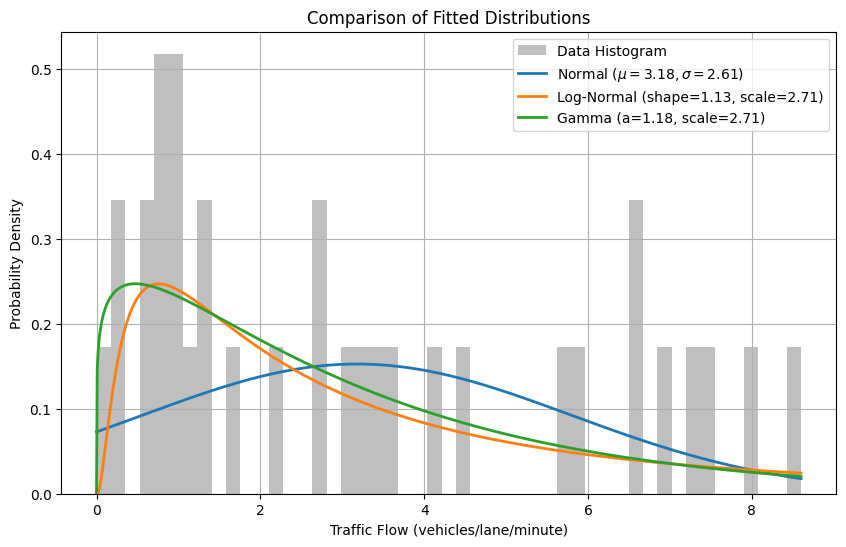

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, gamma
from sklearn.metrics import mean_squared_error, r2_score

# Sample traffic flow data (replace this with your actual data)
# Example: traffic flow/lane/minute
# np.random.seed(42)  # For reproducibility
# data = np.concatenate([
#     np.random.normal(loc=25, scale=7, size=200),  # Level-1 like data
#     np.random.normal(loc=5, scale=3, size=200),   # Level-2 like data
#     np.random.normal(loc=3, scale=2, size=150)     # Level-3 like data
# ])
data = ground_truth_level3['volume/min/lane']
data = data[data > 0]
# Define bins for histogram
bins = np.linspace(0, max(data), 50)
hist, bin_edges = np.histogram(data, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Function to calculate RMSE and R^2
def evaluate_fit(model_pdf, bin_centers, hist):
    predicted = model_pdf(bin_centers)
    mse = mean_squared_error(hist, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(hist, predicted)
    return rmse, r2

# Fit Normal Distribution
mu, sigma = norm.fit(data)
normal_pdf = lambda x: norm.pdf(x, loc=mu, scale=sigma)
normal_rmse, normal_r2 = evaluate_fit(normal_pdf, bin_centers, hist)

# Fit Log-Normal Distribution
shape, loc, scale = lognorm.fit(data, floc=0)
lognorm_pdf = lambda x: lognorm.pdf(x, shape, loc=loc, scale=scale)
lognorm_rmse, lognorm_r2 = evaluate_fit(lognorm_pdf, bin_centers, hist)

# Fit Gamma Distribution
a, loc, scale = gamma.fit(data, floc=0)
gamma_pdf = lambda x: gamma.pdf(x, a, loc=loc, scale=scale)
gamma_rmse, gamma_r2 = evaluate_fit(gamma_pdf, bin_centers, hist)

# Print Results
print(f"Normal Distribution - mu: {mu:.2f}, sigma: {sigma:.2f}")
print(f"Log-Normal Distribution - shape: {shape:.2f}, scale: {scale:.2f}")
print(f"Gamma Distribution - a: {a:.2f}, scale: {scale:.2f}")

print("Model Comparison:")
print(f"Normal Distribution - RMSE: {normal_rmse:.4f}, R^2: {normal_r2:.4f}")
print(f"Log-Normal Distribution - RMSE: {lognorm_rmse:.4f}, R^2: {lognorm_r2:.4f}")
print(f"Gamma Distribution - RMSE: {gamma_rmse:.4f}, R^2: {gamma_r2:.4f}")

# Plot Results
plt.figure(figsize=(10, 6))
plt.hist(data, bins=bins, density=True, alpha=0.5, label="Data Histogram", color="gray")
x = np.linspace(0, max(data), 1000)

# Plot fitted PDFs
plt.plot(x, normal_pdf(x), label=f"Normal ($\mu={mu:.2f}, \sigma={sigma:.2f}$)", lw=2)
plt.plot(x, lognorm_pdf(x), label=f"Log-Normal (shape={shape:.2f}, scale={scale:.2f})", lw=2)
plt.plot(x, gamma_pdf(x), label=f"Gamma (a={a:.2f}, scale={scale:.2f})", lw=2)

plt.title("Comparison of Fitted Distributions")
plt.xlabel("Traffic Flow (vehicles/lane/minute)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

# Level -1
Normal Distribution - mu: 23.89, sigma: 6.92
Log-Normal Distribution - shape: 0.32, scale: 2.26
Gamma Distribution - a: 10.55, scale: 2.26
Model Comparison:
Normal Distribution - RMSE: 0.0210, R^2: 0.3555
Log-Normal Distribution - RMSE: 0.0231, R^2: 0.2185
Gamma Distribution - RMSE: 0.0222, R^2: 0.2745

# Level -2
Normal Distribution - mu: 4.95, sigma: 3.15
Log-Normal Distribution - shape: 0.97, scale: 3.05
Gamma Distribution - a: 1.62, scale: 3.05
Model Comparison:
Normal Distribution - RMSE: 0.0618, R^2: -0.0246
Log-Normal Distribution - RMSE: 0.0677, R^2: -0.2289
Gamma Distribution - RMSE: 0.0617, R^2: -0.0198

# Level -3
Normal Distribution - mu: 3.18, sigma: 2.61
Log-Normal Distribution - shape: 1.13, scale: 2.71
Gamma Distribution - a: 1.18, scale: 2.71
Model Comparison:
Normal Distribution - RMSE: 0.1476, R^2: -0.0926
Log-Normal Distribution - RMSE: 0.1265, R^2: 0.1979
Gamma Distribution - RMSE: 0.1277, R^2: 0.1817

In [ ]:
Normal Distribution - RMSE: 0.0210, R^2: 0.3555
Normal Distribution - RMSE: 0.0618, R^2: -0.0246
Normal Distribution - RMSE: 0.1476, R^2: -0.0926

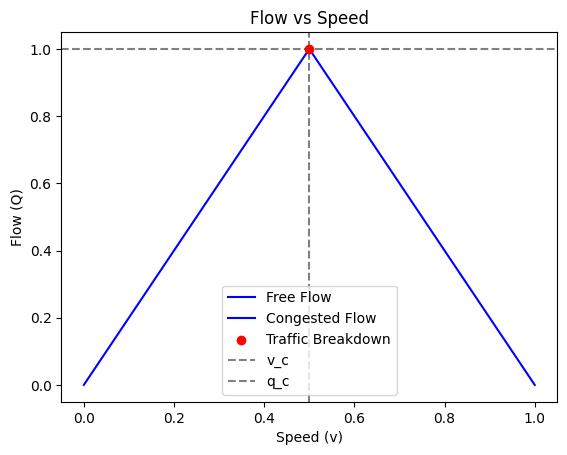

In [2]:
# Data for the flow-speed graph
v = np.linspace(0, 1, 500)
vc = 0.5  # Critical speed
vm = 1.0  # Maximum speed
qc = 1.0  # Critical flow

# Free and congested flow
Q_free = qc * v / vc
Q_congested = qc * (vm - v) / (vm - vc)

# Create figure and axes
fig, ax1 = plt.subplots()

# Plot free flow and congested flow
ax1.plot(v[v <= vc], Q_free[v <= vc], label='Free Flow', color='blue')
ax1.plot(v[v > vc], Q_congested[v > vc], label='Congested Flow', color='blue')

# Highlight critical points
ax1.scatter(vc, qc, color='red', zorder=5, label='Traffic Breakdown')
ax1.axvline(vc, color='gray', linestyle='--', label='v_c')
ax1.axhline(qc, color='gray', linestyle='--', label='q_c')

# Set labels
ax1.set_xlabel('Speed (v)')
ax1.set_ylabel('Flow (Q)')
ax1.set_title('Flow vs Speed')
ax1.legend()

# Show plot
plt.show()


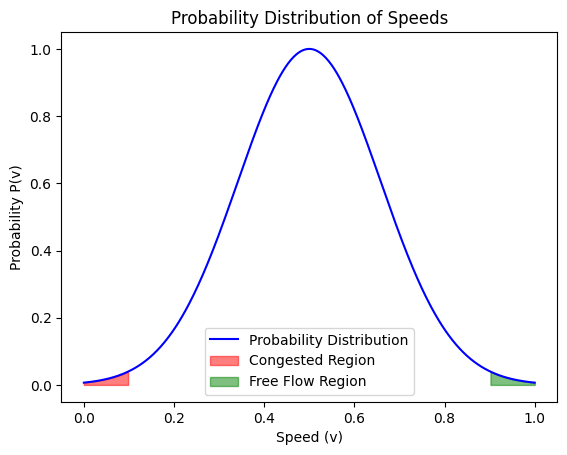

In [3]:
# Probability distribution for speed
P_v = np.exp(-((v - vc) ** 2) / 0.05)

# Create figure and axes
fig, ax2 = plt.subplots()

# Plot the probability distribution
ax2.plot(v, P_v, label='Probability Distribution', color='blue')

# Highlight regions
ax2.fill_between(v[v <= 0.1*vm], P_v[v <= 0.1*vm], color='red', alpha=0.5, label='Congested Region')
ax2.fill_between(v[v >= 0.9*vm], P_v[v >= 0.9*vm], color='green', alpha=0.5, label='Free Flow Region')

# Set labels
ax2.set_xlabel('Speed (v)')
ax2.set_ylabel('Probability P(v)')
ax2.set_title('Probability Distribution of Speeds')
ax2.legend()

# Show plot
plt.show()

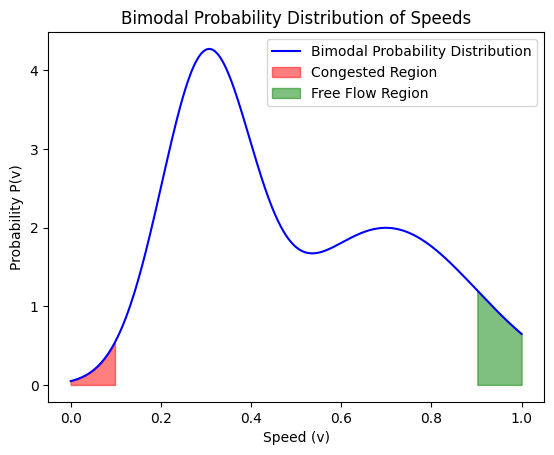

In [7]:

# Define the speed range
v = np.linspace(0, 1, 500)

# Define parameters for two Gaussian functions
mu1 = 0.3  # Mean for the first Gaussian (congested flow)
sigma1 = 0.1  # Standard deviation for the first Gaussian

mu2 = 0.7  # Mean for the second Gaussian (free flow)
sigma2 = 0.2  # Standard deviation for the second Gaussian

# Bimodal Gaussian distribution: sum of two Gaussian functions
P_v = (1/(sigma1 * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((v - mu1) / sigma1)**2) +
       1/(sigma2 * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((v - mu2) / sigma2)**2))

# Create the plot
fig, ax = plt.subplots()

# Plot the bimodal distribution
ax.plot(v, P_v, label='Bimodal Probability Distribution', color='blue')

# Highlight the congested region (for example, near v = 0.1)
ax.fill_between(v[v <= 0.1], P_v[v <= 0.1], color='red', alpha=0.5, label='Congested Region')

# Highlight the free flow region (for example, near v = 0.9)
ax.fill_between(v[v >= 0.9], P_v[v >= 0.9], color='green', alpha=0.5, label='Free Flow Region')

# Add labels and title
ax.set_xlabel('Speed (v)')
ax.set_ylabel('Probability P(v)')
ax.set_title('Bimodal Probability Distribution of Speeds')

# Show legend
ax.legend()

# Show the plot
plt.show()
